# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Traffic Analysis & Prediction
A Report for Tasty Bytes

In [48]:
# Import required libraries (data val, cleaning, EDA)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('recipe_site_traffic_2212.csv')

## Data Validation & Cleaning

First, I want to get a high level overview/ feel of the data.

In [50]:
df.head(10)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High
6,7,183.94,47.95,9.75,46.71,Chicken Breast,4,NaN
7,8,299.14,3.17,0.40,32.40,Lunch/Snacks,4,NaN
8,9,538.52,3.78,3.37,3.79,Pork,6,High
9,10,248.28,48.54,3.99,113.85,Chicken,2,NaN


Next, I'll find out how many rows are in the data

In [51]:
x, y = df.shape
print(f"Ther are {x} rows in the dataset")

Ther are 947 rows in the dataset


Now that I know how many rows/ records has the dataset, I want to know if there are any null values. 

If there are null values, I want to know how many they are relative to the total number of rows in the data.

In [52]:
df.isnull().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

I've noticed that:
- 4 columns have the same number of missing values (52). They are all nutrient related columns. Could this be a pattern? Could it be that records that have missing data in one nutrient column, have missing data in all other nutrient columns? We'll confirm this next!
- `high_traffic` the target variable has 373 missing values. This is about 40% of the entire dataset. I'll have to investigate the column further to know how to handle these missing values.

In [53]:
df_null = df[df.drop(columns='high_traffic').isnull().any(axis=1)]
df_null

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
23,24,NaN,NaN,NaN,NaN,Meat,2,NaN
48,49,NaN,NaN,NaN,NaN,Chicken Breast,4,NaN
82,83,NaN,NaN,NaN,NaN,Meat,4,High
89,90,NaN,NaN,NaN,NaN,Pork,6,High
116,117,NaN,NaN,NaN,NaN,Chicken Breast,6,High
121,122,NaN,NaN,NaN,NaN,Dessert,2,High
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,High
149,150,NaN,NaN,NaN,NaN,Potato,2,High
187,188,NaN,NaN,NaN,NaN,Pork,4,High


There's a pattern!

The total number of rows is 52 which is equivalent of the total number of missing values in each of the nutrient related columns. Also, by a visual row based inspection of the dataset, I saw that indeed, records with missing data in one nutrient column, have missing data in all other nutrient columns.

Next, I'll check if the nutrient values of recipes in the same category and serving size fall within a close range.

In [54]:
 df.groupby(['category', 'servings']).agg({
     'calories': ['mean', 'median', 'max', 'min', 'std'],
     'protein': ['mean', 'median', 'max', 'min', 'std'],
     'sugar': ['mean', 'median', 'max', 'min', 'std'],
     'carbohydrate': ['mean', 'median', 'max', 'min', 'std']}).reset_index()

category      servings     calories  ... carbohydrate                  
                                         mean  ...          max    min        std
0        Beverages             1   180.341000  ...        56.72   0.58  13.083318
1        Beverages             2   245.478824  ...        77.70   0.16  23.108993
2        Beverages             4   162.894706  ...        45.21   0.35  12.509611
3        Beverages             6   144.427619  ...        58.08   1.18  18.514975
4        Breakfast             1   401.969615  ...       158.92   1.50  35.851529
5        Breakfast             2   374.082857  ...       173.93   1.42  44.517500
6        Breakfast             4   266.214634  ...       159.72   1.83  39.050141
7        Breakfast             6   330.973889  ...       140.96   2.12  36.617674
8          Chicken             1   419.004000  ...        88.55   3.21  26.162898
9          Chicken             2   573.600000  ...       243.20   2.46  67.338335
10         Chicken             4   703.353667  ...       131.80   0.41  27.546723
11         Chicken             6   387.458182  ...        70.81   3.43  20.072857
12  Chicken Breast             1   611.538000  ...        44.68   0.80  13.180339
13  Chicken Breast             2   447.079375  ...        71.58   3.73  21.759354
14  Chicken Breast             4   469.466154  ...        89.20   0.03  23.200368
15  Chicken Breast             6   689.400526  ...        50.22   0.13  17.150619
16         Dessert             1   317.120625  ...       239.06   0.19  62.435552
17         Dessert             2   256.160769  ...       127.47   2.67  35.742176
18         Dessert             4   372.850714  ...       210.77   3.74  57.865965
19         Dessert             6   410.706000  ...       202.66   0.53  48.615289
20    Lunch/Snacks             1   591.517059  ...        75.43   5.07  24.835423
21    Lunch/Snacks             2   473.288000  ...       177.22   1.05  48.014811
22    Lunch/Snacks             4   422.053448  ...       154.18   0.08  39.641009
23    Lunch/Snacks  4 as a snack  1028.140000  ...        65.87  14.73  36.161441
24    Lunch/Snacks             6   354.108333  ...       163.33   1.47  51.335876
25    Lunch/Snacks  6 as a snack  1440.690000  ...        30.59  30.59        NaN
26            Meat             1   659.651538  ...       101.11   0.10  30.090931
27            Meat             2   636.413077  ...        48.84   0.21  14.794831
28            Meat             4   571.235588  ...        68.04   0.48  18.827489
29            Meat             6   498.903571  ...        55.60   2.65  15.726263
30   One Dish Meal             1   770.896923  ...       140.22   3.42  40.961890
31   One Dish Meal             2   534.366818  ...       152.24   3.46  37.622534
32   One Dish Meal             4   570.316667  ...       195.80   0.31  59.359718
33   One Dish Meal             6   458.604545  ...       265.09   0.08  86.032659
34            Pork             1   716.210000  ...       111.08   1.84  33.325393
35            Pork             2   565.615625  ...        96.11   0.47  24.628124
36            Pork             4   575.858485  ...        96.71   0.98  26.350407
37            Pork             6   764.641333  ...        75.39   2.32  20.573880
38          Potato             1   616.695000  ...       383.06   0.14  97.582775
39          Potato             2   312.203000  ...       224.16  11.53  75.147816
40          Potato             4   432.185000  ...       530.42   0.05  93.679107
41          Potato             6   346.359565  ...       162.91   2.99  47.490663
42       Vegetable             1   222.646667  ...        69.94   2.28  25.075621
43       Vegetable             2   175.022222  ...        55.80   1.90  15.090958
44       Vegetable             4   247.720000  ...       107.12   0.86  27.919929
45       Vegetable             6   336.862857  ...       103.46   0.62  26.569508

[46 rows x 22 columns]

The table above reveals that:
- nutrient values do not fall within a close range even when grouped by their category and serving size. 
- The implication of this is that category and serving size do not provide enough information to predict or impute the missing values in the nutrient columns. 
- This is true because the nutrient values of a recipe are affected by other factors stated in the data information (i.e. ingredients) which are not captured in the dataset. 
- Imputing values based on category/ servings will lead to bias. 

Therefore, I've decided to drop all 52 rows with missing values across all nutrient columns from the dataset. 


In [55]:
nutrient_cols = ['calories', 'protein', 'carbohydrate', 'sugar']
df = df.dropna(subset=nutrient_cols)

Now that I've taken care of the null values in the nutrient columns, I'm to check the percentage of missing values to non missing values in the high_traffic column.

In [56]:
null_percent = (df.isnull().sum().sum()/ len(df)) *100
print(f"{round(null_percent,2)}% of the high_traffic column are null values.")

40.22% of the high_traffic column are null values.


That is still pretty high for the target variable. I'll inspect it further.

In [57]:
df.nunique()

recipe          895
calories        891
carbohydrate    835
sugar           666
protein         772
category         11
servings          6
high_traffic      1
dtype: int64

More discrepancies unveiled!

- Category is meant to have 10 categories, how come there are 11 unique values? I'll investigate this column.
- `high_traffic` seems to have only 1 category (we need a minimum of 2 classes for a classification task). Also, recall that about 40% of the data in the column is missing. The instruction from the product manager clearly states that every recipe has been displayed in the past. It's very likely that the system only took note of recipes that generated high traffic, leaving the rest AS blank. The conclusion is that the null values actually represent recipes that had low traffic. 
    - Action step: replace null values with 'low'

In [58]:
# Replacing null values in high_traffic as 'low'

df['high_traffic'].fillna('low', inplace=True)
df.rename(columns={'high_traffic': 'traffic'}, inplace=True)

Before listing out the unique values in the 'category' column to investigate the extra category, I'll check the data types to confirm they're in line with the data dictionary provided.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        895 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      895 non-null    object 
 6   servings      895 non-null    object 
 7   traffic       895 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 62.9+ KB


Another issue detected!

`servings` was described as a numerical column in the data dictionary. If pandas has labeled it as an object then there might be some inaccuracies. I'll investigate further.

By listing out all unique values in the columns, I'll investigate why:
- `servings` is an object column rather than a numeric column
- `category` has 11 instead of 10 unique values 

In [60]:
cat_cols = ['category', 'servings']

for col in cat_cols:
    print(df[col].unique())

['Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Pork' 'Chicken' 'Vegetable' 'Meat' 'Dessert']
['4' '1' '2' '6' '4 as a snack' '6 as a snack']


I've noticed:
- A new category 'Chicken Breast' was added to the 'category'. 
    - Action step: Replace all 'Chicken Breast' with 'Chicken' since chicken breast is technically still chicken.
- There are non numerical values in the the 'servings' column associated with the snack category. Investigate them further.

In [61]:
# Replacing 'chicken breast' with 'chicken'

df['category'].replace({'Chicken Breast': 'Chicken'}, inplace=True)

In [62]:
df[df['servings'].isin(['4 as a snack', '6 as a snack'])]

,recipe,calories,carbohydrate,sugar,protein,category,servings,traffic
451,452,1542.53,14.73,5.71,29.92,Lunch/Snacks,4 as a snack,High
548,549,1440.69,30.59,5.78,30.63,Lunch/Snacks,6 as a snack,High
735,736,513.75,65.87,18.63,18.39,Lunch/Snacks,4 as a snack,low


I notice that '4 as a snack' and '6 as a snack' are associated with the lunch/snacks category. However, there are only 3 rows with these values. Does this mean there are only 3 rows in the lunch/snacks category? I'll find out!

In [63]:
df['category'].value_counts()

Chicken          163
Breakfast        106
Beverages         92
Potato            83
Lunch/Snacks      82
Vegetable         78
Dessert           77
Meat              74
Pork              73
One Dish Meal     67
Name: category, dtype: int64

There are 82 values in the Lunch/Snacks column. The suffix 'as a snack' could be indicating that the recipes in question are snacks not lunch. To sort this out:
- I'll seperate lunch/snacks into 2 categories - lunch and snacks
- Snacks category will be the values that have 'as a snack' suffix.
- I'll remove the suffix and convert the column to a numeric column 

In [64]:
# Fixing Serving column

df['category'] = np.where(df['servings'].str.contains('as a snack'), 'Snacks', df['category'])

df['category'] = np.where((df['category'] == 'Lunch/Snacks'), 'Lunch', df['category'])

df['servings'] = df['servings'].str.replace(' as a snack', '').astype(int)

Next, I'll convert data types of 'category' and 'high_traffic' to category data type for easy encoding


In [65]:
char_cols = ['category', 'traffic']
df[char_cols] = df[char_cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        895 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      895 non-null    category
 6   servings      895 non-null    int64   
 7   traffic       895 non-null    category
dtypes: category(2), float64(4), int64(2)
memory usage: 51.2 KB


Now, the final phase of the data validation & cleaning. I'm going to check for duplicates.

In [66]:
print(f"The data contains {df.duplicated().sum()} duplicates")

The data contains 0 duplicates


In [67]:
df.head(10)

,recipe,calories,carbohydrate,sugar,protein,category,servings,traffic
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,low
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,low
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High
6,7,183.94,47.95,9.75,46.71,Chicken,4,low
7,8,299.14,3.17,0.40,32.40,Lunch,4,low
8,9,538.52,3.78,3.37,3.79,Pork,6,High
9,10,248.28,48.54,3.99,113.85,Chicken,2,low
10,11,170.12,17.63,4.10,0.91,Beverages,1,low


### Data Validation & Cleaning Summary:
- There were initially 947 records in the dataset but after dropping the 52 rows that had missing values across all 4 nutrient-related columns, the dataset now has 895 records.
- The `high_traffic` column had 40.22% missing values
    - I replaced the null values with 'low'. I did this because the column had only 1 category 'high' but a classification task requires at least 2 categories. I renamed the column as 'traffic' for better clarity
- There were no duplicates
- The 'category' column had 11 categories/ unique values instead of 10 as specified on the data dictionary.
    - I combined the added category 'chicken breast' with standard category 'chicken' by replacing all 'chicken breast' categories with 'chicken'
- The 'serving' column which was specified as a numerical column in the data dictionary was labeled as an object column
    - After investigation, I found some non-numeric data in the serving column which were associated with the lunch/snack category in the category column
    - I split lunch/snack into separate categories to justify the removal of the suffix 'as a snack' in the non-numerical data found in the 'servings' column
- I corrected the data types of the following columns:
    - serving from object dtype to int dtype
    - category & traffic from object dtype to category dtype

## Exploratory Data Analysis

### Summary Statistics

In [68]:
df.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,473.652514,435.939196,35.069676,9.046547,24.149296,3.458101
std,272.763283,453.020997,43.949032,14.679176,36.369739,1.735979
min,2.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000,2.000000
50%,475.000000,288.550000,21.480000,4.550000,10.800000,4.000000
75%,708.500000,597.650000,44.965000,9.800000,30.200000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


#### Notes & Action steps from summary statistics
- No negative values in numerical columns
- The numbers across and within a column have a wide range
    - I'll standardize the numerical variables to  bring them to a common scale with a mean of 0 and std of 1. This will help in reducing the impact of different scales on model performance.
- Outliers are present as the difference between the maximum value and the 75th percentile is substantial, indicating a wide spread of values beyond the bulk of the data.
    - Clear indication to use a model that's robust to outliers
- In several columns, the std is close or greater than the mean. 
    - Clear indication that there's high variability in data and skewness. 
    - I will investigate further to understand the distribution of the data.

### Target Variable - Traffic
Is the class balanced?

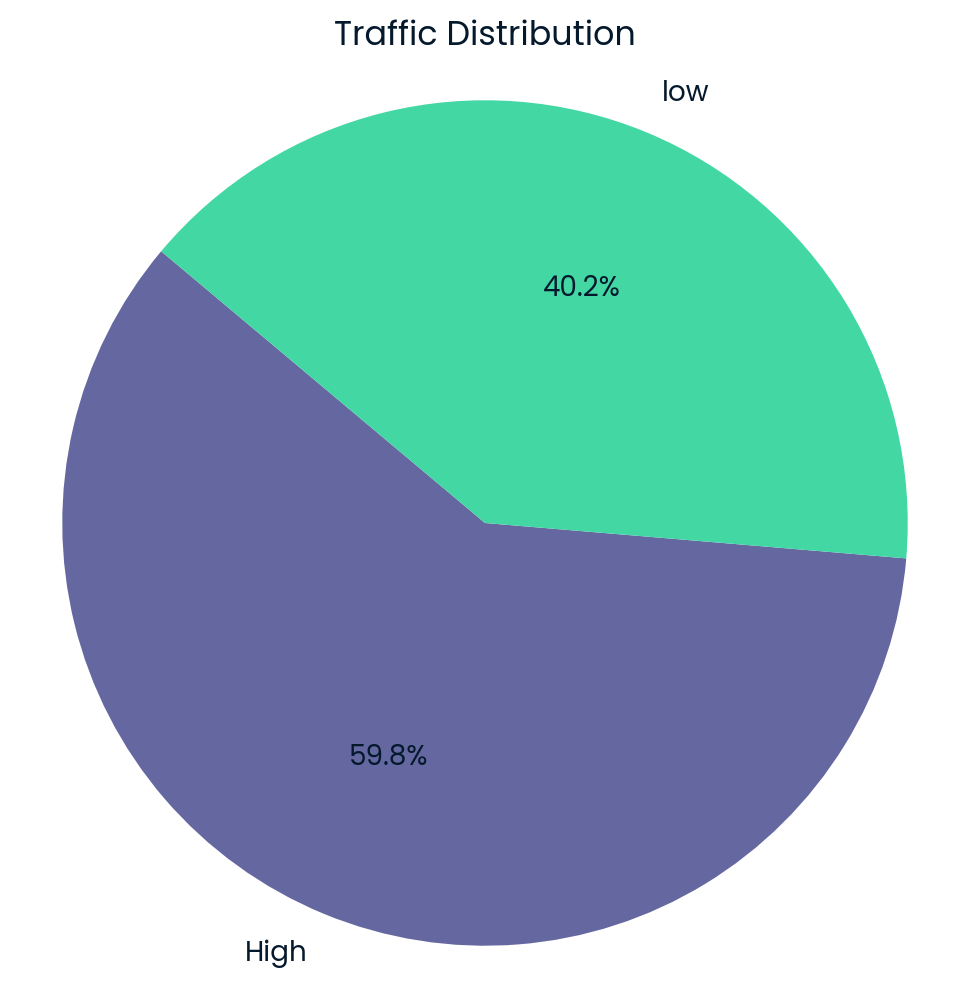

In [69]:
traffic_counts = df['traffic'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(traffic_counts, 
        labels=traffic_counts.index, 
        autopct='%1.1f%%', 
        startangle=140)
plt.title('Traffic Distribution')
plt.axis('equal')
plt.show()

The target variable is not significantly imbalanced so no further actions will be taken.

### Categorical Variables - Category, Servings
I decided to treat 'Servings' as a categorical variable because it has very few unique values 

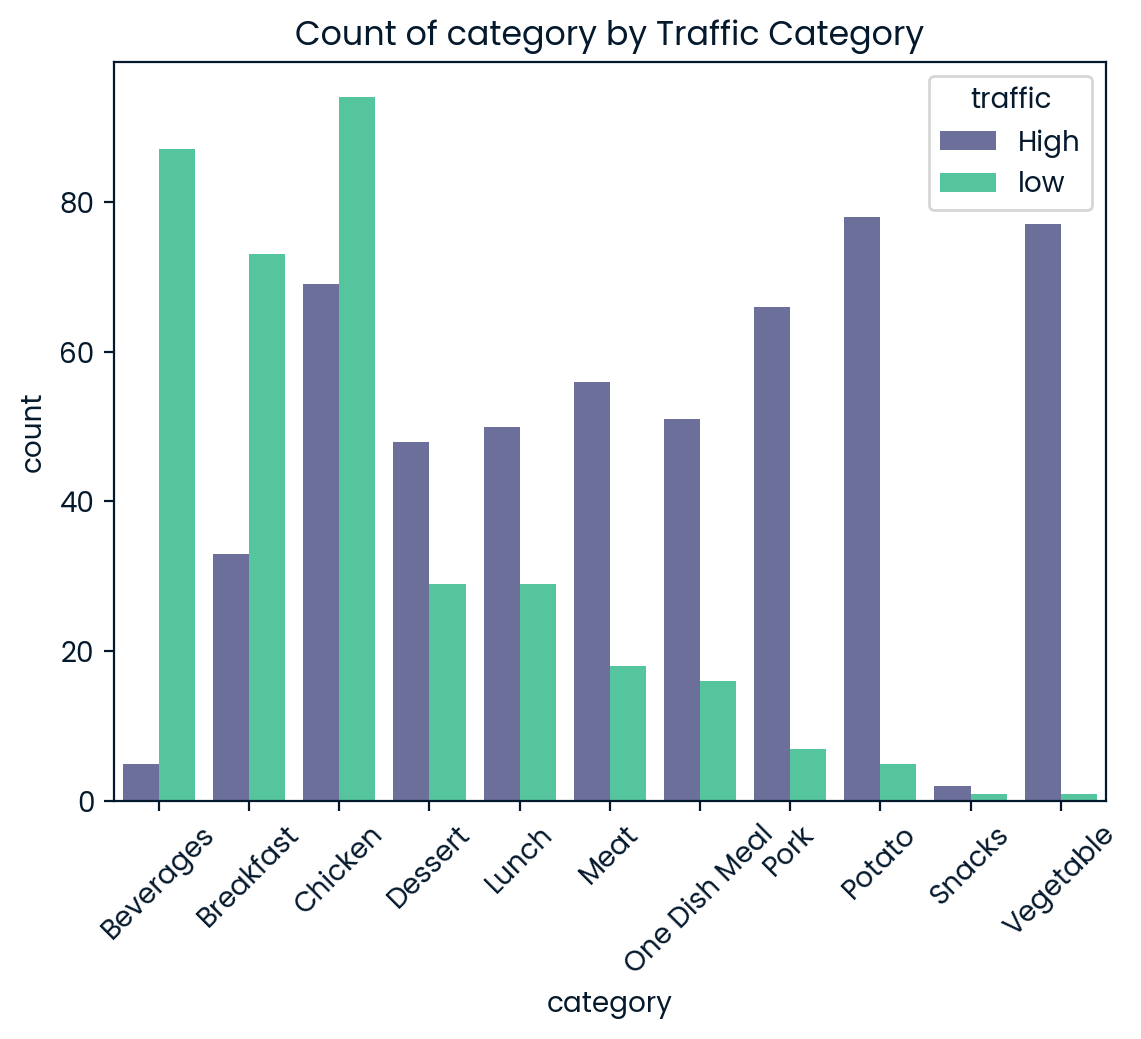

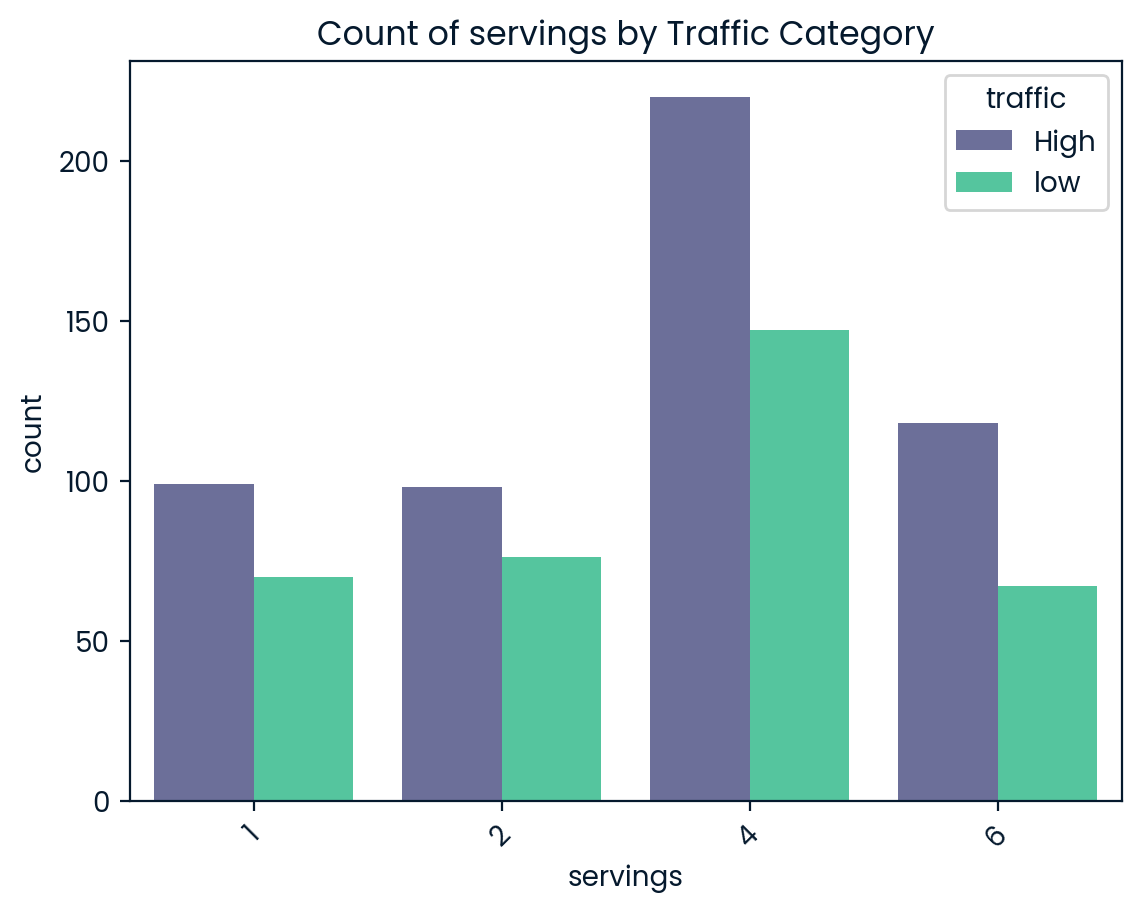

In [70]:
for feature in cat_cols:
    sns.countplot(x=feature, hue='traffic', data=df)
    plt.title(f'Count of {feature} by Traffic Category')
    plt.xticks(rotation=45)
    plt.show()

#### Findings:

- There's a significant imbalance observed when I compared the distribution of different categories by traffic.
- The following food categories are typically associated with high traffic:
    - Meat
    - Pork
    - One dish meal
    - Vegetable
    - Potato

- The following food categories are typically associated with low traffic:
    - Beverages
    - Breakfast
- Minimal inbalance in servings, _might_ be an indicator that it's not a very strong predictive feature.
- 4 is the most popular serving size among high traffic recipes.




### Numerical Variables - Calories, Protein, Carbohydrate, Sugar
I'll  plot a Pairplot to show their distribution and relationship when grouped by traffict. 

Pairplot = Density plot for single variable analysis and Scatter plot for bivariate analysis.

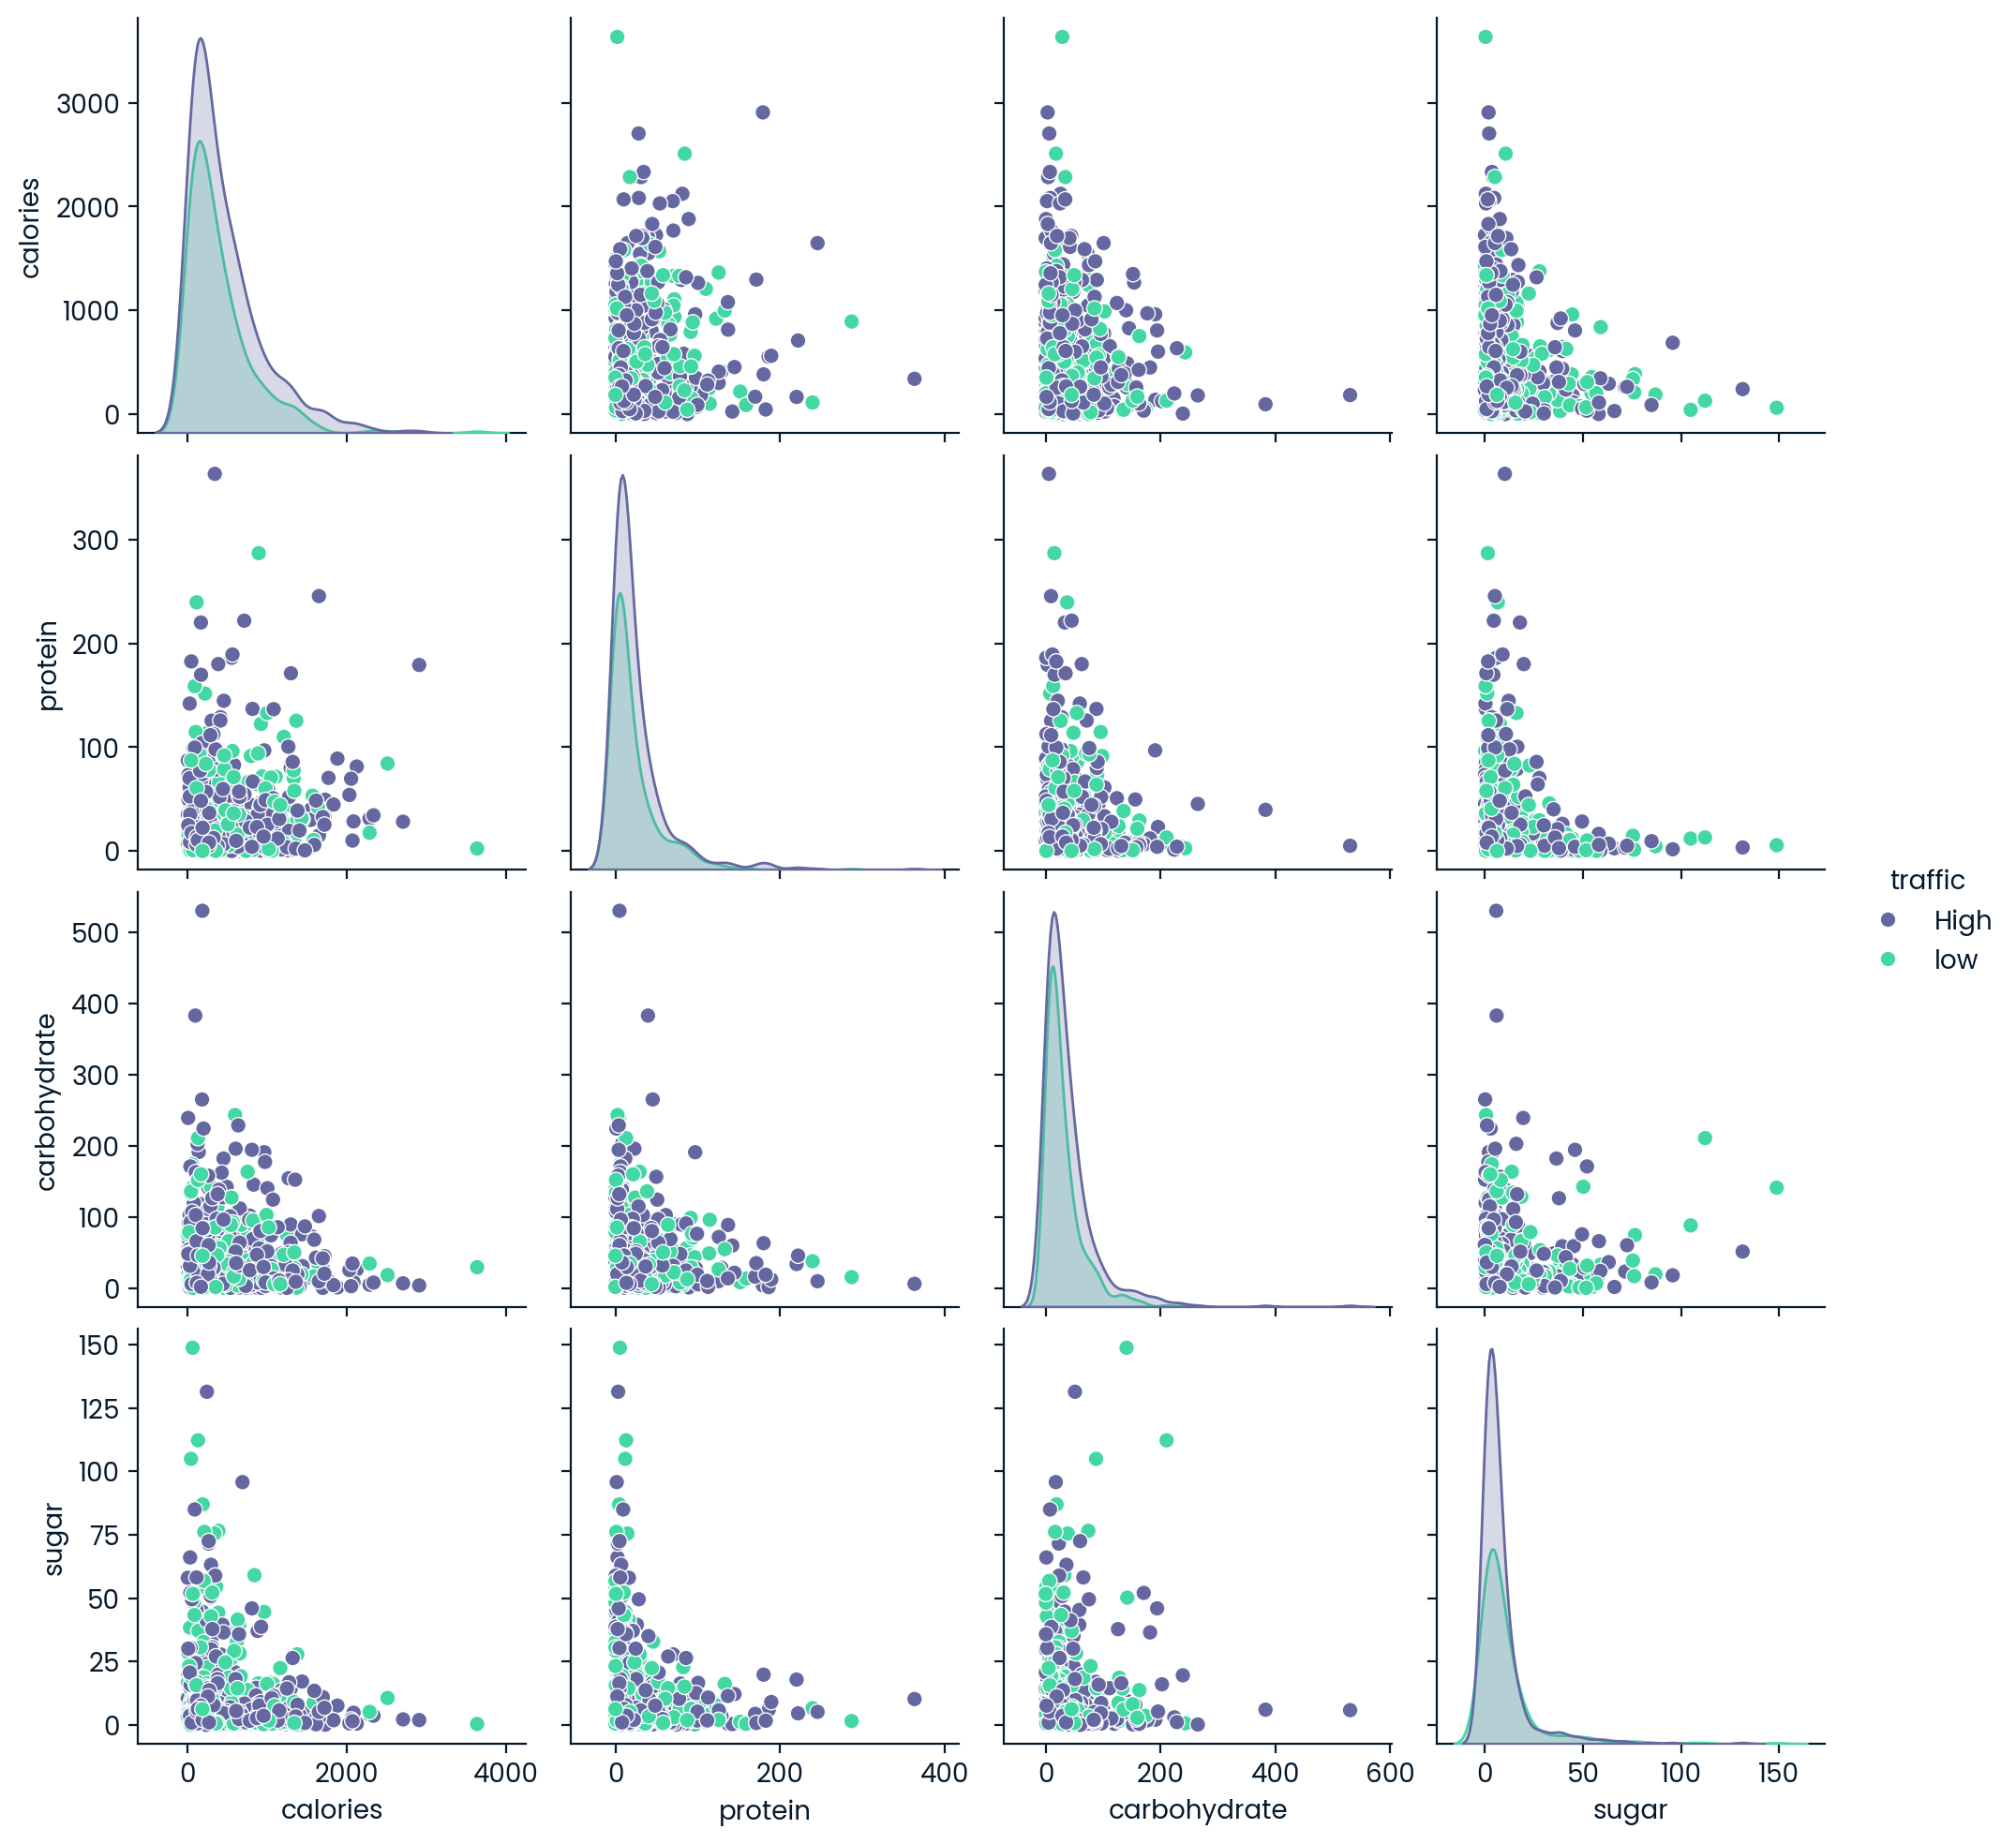

In [71]:
sns.pairplot(df, hue='traffic', vars=nutrient_cols)
plt.show()

#### Observations

- Skewed data confirmed
    - Perform data transformation. (It is highly right skewed so log transformation will be the most suitable)
- Relationship between numerical variables are non-linear

### Findings
It's tough to see if there's any association between the nutrient value and traffic size using the pair plot. I'll get a clearer view by bucketing the nutrient columns


I've noticed protein contents in low-traffic recipes appear to skew lower. This indicates that there's a possible association. I'll dig deeper.

### Feature Engineering
I'm creating new buckets for all nutrient-related column based on their distribution as observed in the description table and pairplot.

In [72]:
#  calories
calories_thresholds = df['calories'].quantile([0.20, 0.85]).values
df['calories_bucket'] = pd.cut(df['calories'], bins=[-np.inf, calories_thresholds[0], calories_thresholds[1], np.inf], labels=['low', 'medium', 'high'])


In [73]:
protein_thresholds = df['protein'].quantile([0.40, 0.85]).values
df['protein_bucket'] = pd.cut(df['protein'], bins=[-np.inf, protein_thresholds[0], protein_thresholds[1], np.inf], labels=['low', 'medium', 'high'])

In [74]:
sugar_thresholds = df['sugar'].quantile([0.65, 0.90]).values
df['sugar_bucket'] = pd.cut(df['sugar'], bins=[-np.inf, sugar_thresholds[0], sugar_thresholds[1], np.inf], labels=['low', 'medium', 'high'])

In [75]:
carbohydrate_thresholds = df['carbohydrate'].quantile([0.50, 0.85]).values
df['carbohydrate_bucket'] = pd.cut(df['carbohydrate'], bins=[-np.inf, carbohydrate_thresholds[0], carbohydrate_thresholds[1], np.inf], labels=['low', 'medium', 'high'])

The data with the newly engineered features

In [76]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,traffic,calories_bucket,protein_bucket,sugar_bucket,carbohydrate_bucket
1,2,35.48,38.56,0.66,0.92,Potato,4,High,low,low,low,medium
2,3,914.28,42.68,3.09,2.88,Breakfast,1,low,high,low,low,medium
3,4,97.03,30.56,38.63,0.02,Beverages,4,High,medium,low,high,medium
4,5,27.05,1.85,0.80,0.53,Beverages,4,low,low,low,low,low
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High,medium,high,low,low


In [77]:
# function to compare buckets by traffic

def plot_bucket_distribution(df, nutrient_bucket, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=nutrient_bucket, hue='traffic', data=df, order=['low', 'medium', 'high'])
    plt.title(title)
    plt.xlabel('Nutrient Bucket')
    plt.ylabel('Count')
    plt.legend(title='Traffic')
    plt.show()


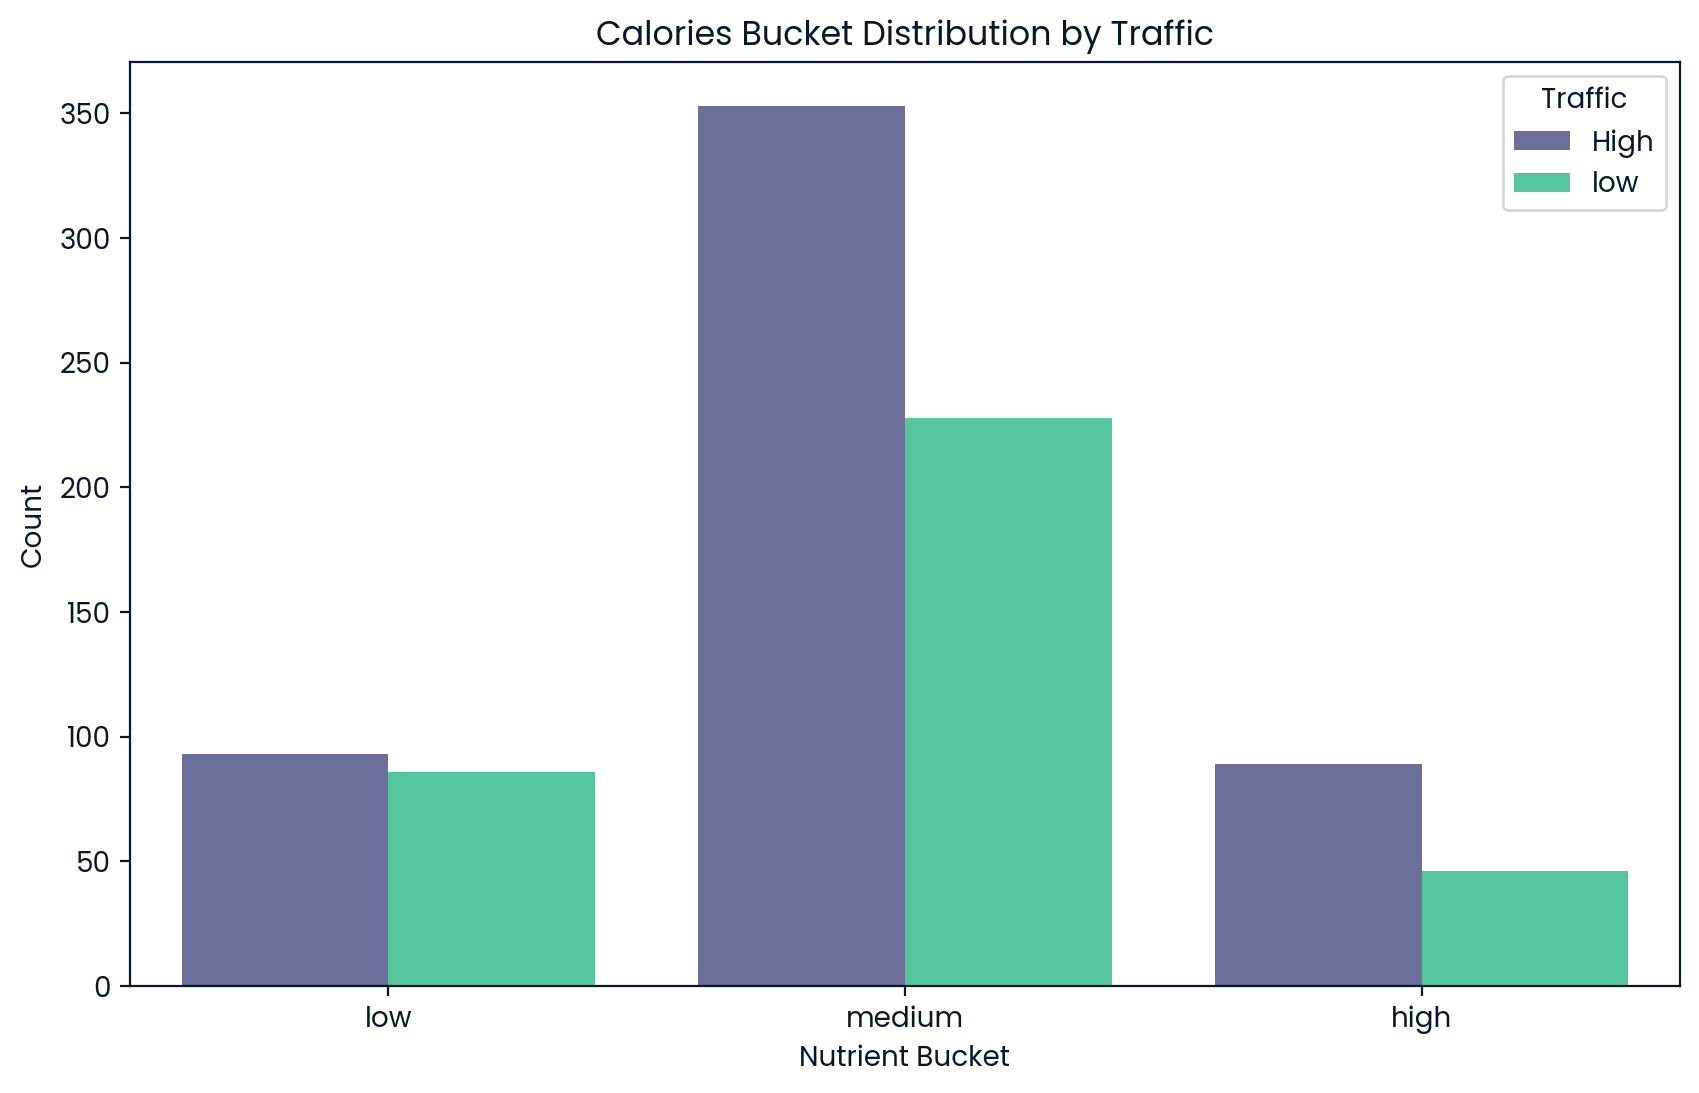

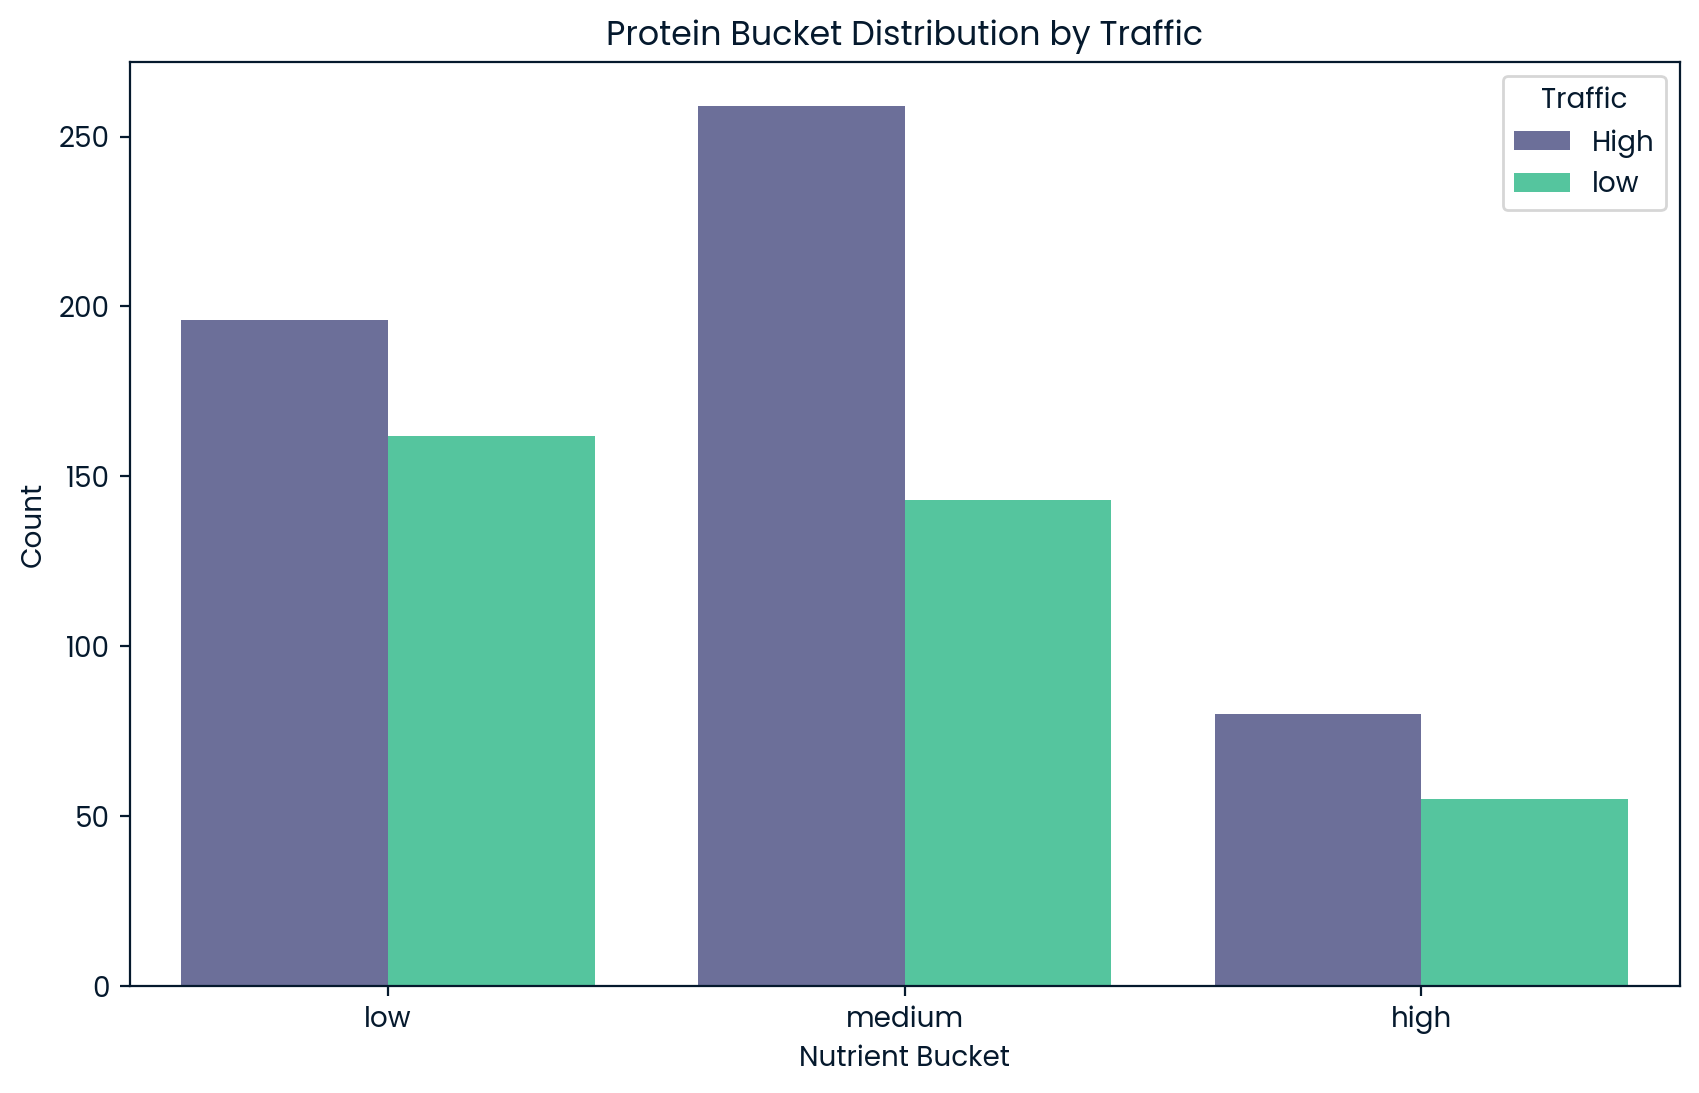

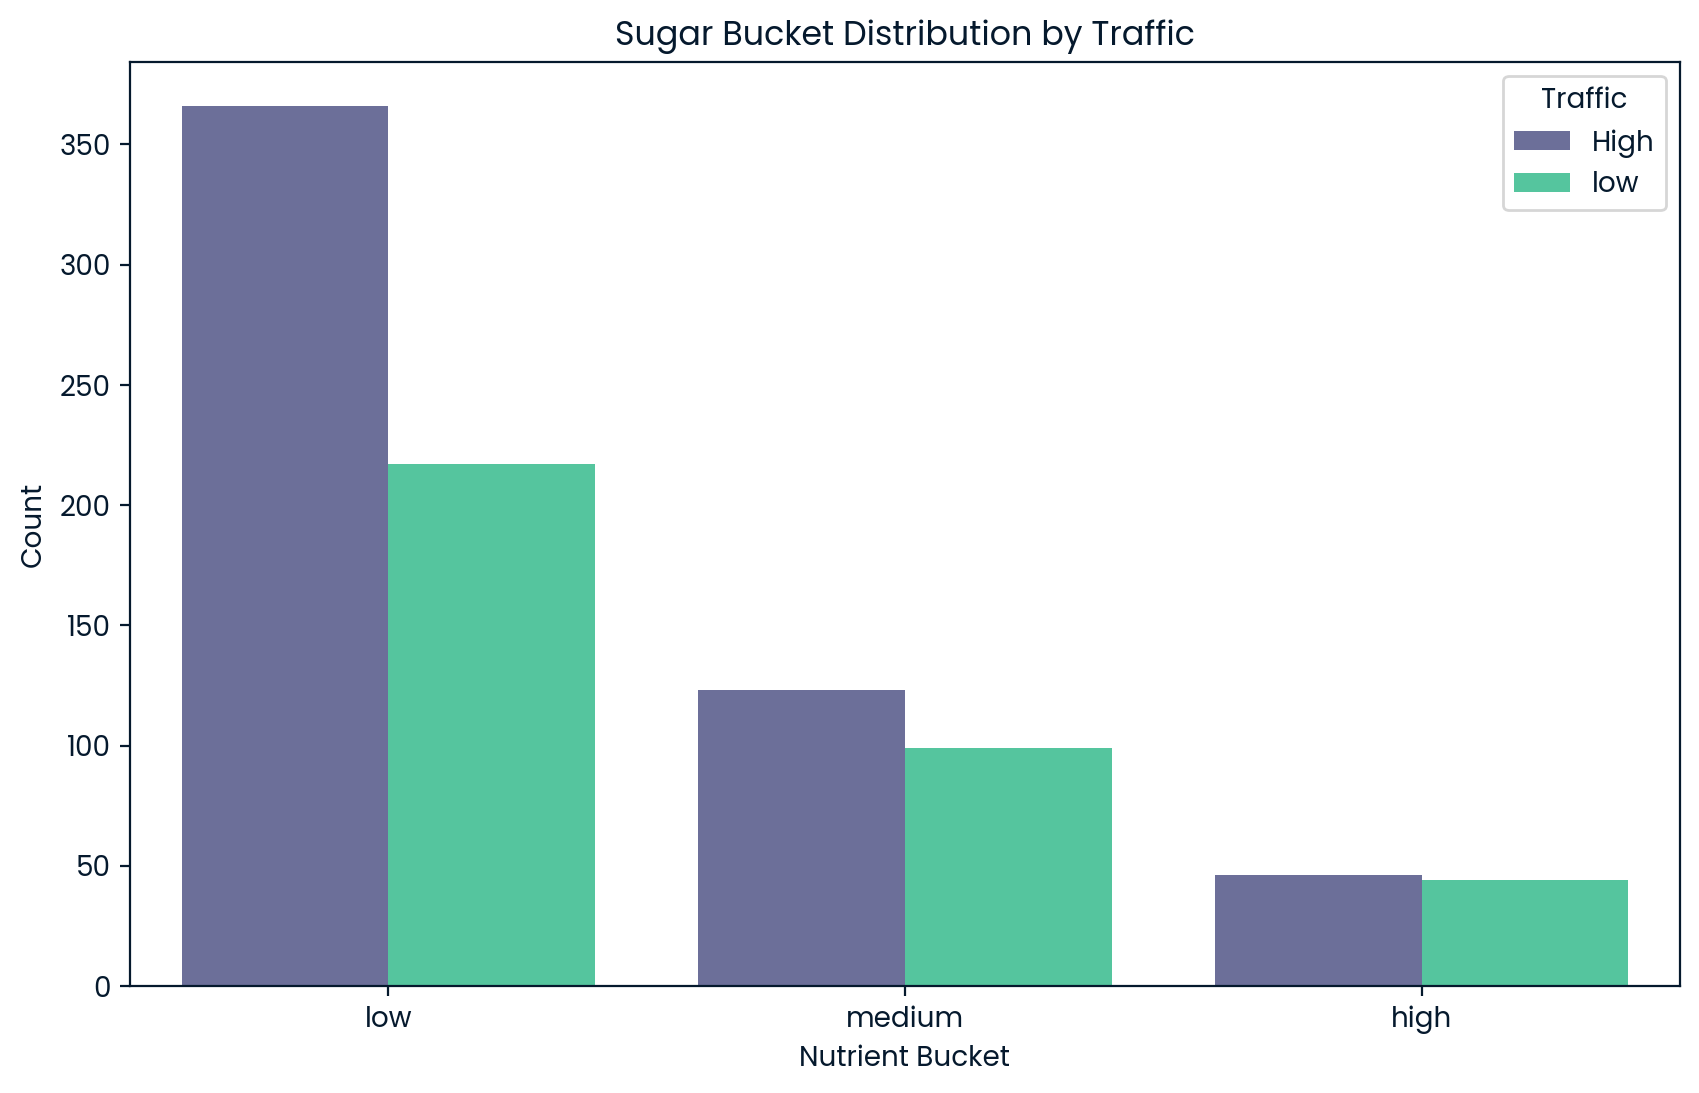

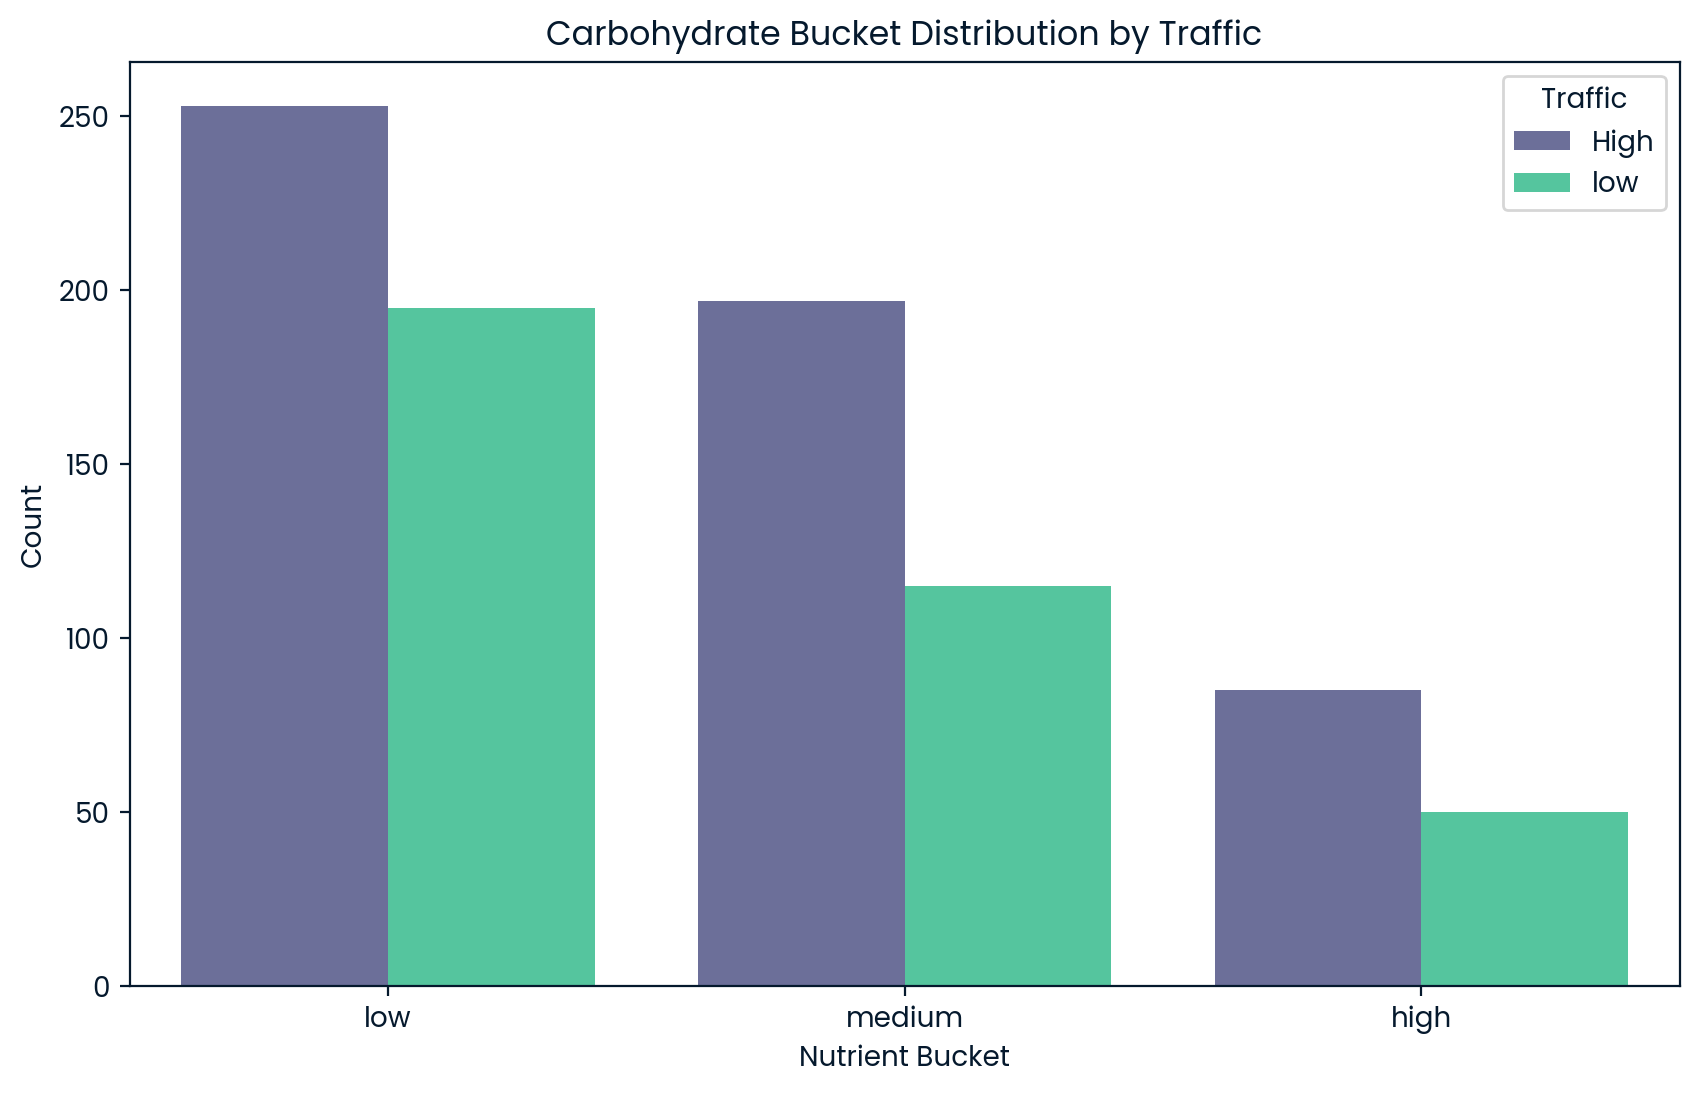

In [78]:
plot_bucket_distribution(df, 'calories_bucket', 'Calories Bucket Distribution by Traffic')
plot_bucket_distribution(df, 'protein_bucket', 'Protein Bucket Distribution by Traffic')
plot_bucket_distribution(df, 'sugar_bucket', 'Sugar Bucket Distribution by Traffic')
plot_bucket_distribution(df, 'carbohydrate_bucket', 'Carbohydrate Bucket Distribution by Traffic')

Confirmed! No nutrient bucket is associated with any particular traffic size as there's no significant inbalance in the bar charts above.

## Model Development & Evaluation

In [79]:
# import required libraries (ML Development)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, precision_score, confusion_matrix

### Data Preparation
In the next couple of code cells, I'll perform the following steps:
- **MinMax scaling** to make the numerical variables within a fixed range of 0 and 1. This wiill improve the impact of the log transformation and I picked minmax over standard scaler because of the presence of outliers in the data.
- **Log transformation** to reduce skewness which in turn improves model performance.
- **One-hot encode the category column** to convert it into a format that can be fed to the model. I've chosen one hot encoding because the values in the category column do not have an inherent order.
- **Label encode the bucket columns** because they're rather hierachical and they need to be in a format that can be fed into the model.
- **Make 'traffic' column a binary column** to convert it into a format that can be fed into the model.
- **Train-test split** with a train to test ratio of 90:10 and stratified sampling enabled because the dataset is relatively small (<1000 rows)

In [80]:
# Min max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(df[nutrient_cols])

In [81]:
# Log transformation
df[nutrient_cols] = np.log1p(df[nutrient_cols])

I've scaled the data and performed log transformation.

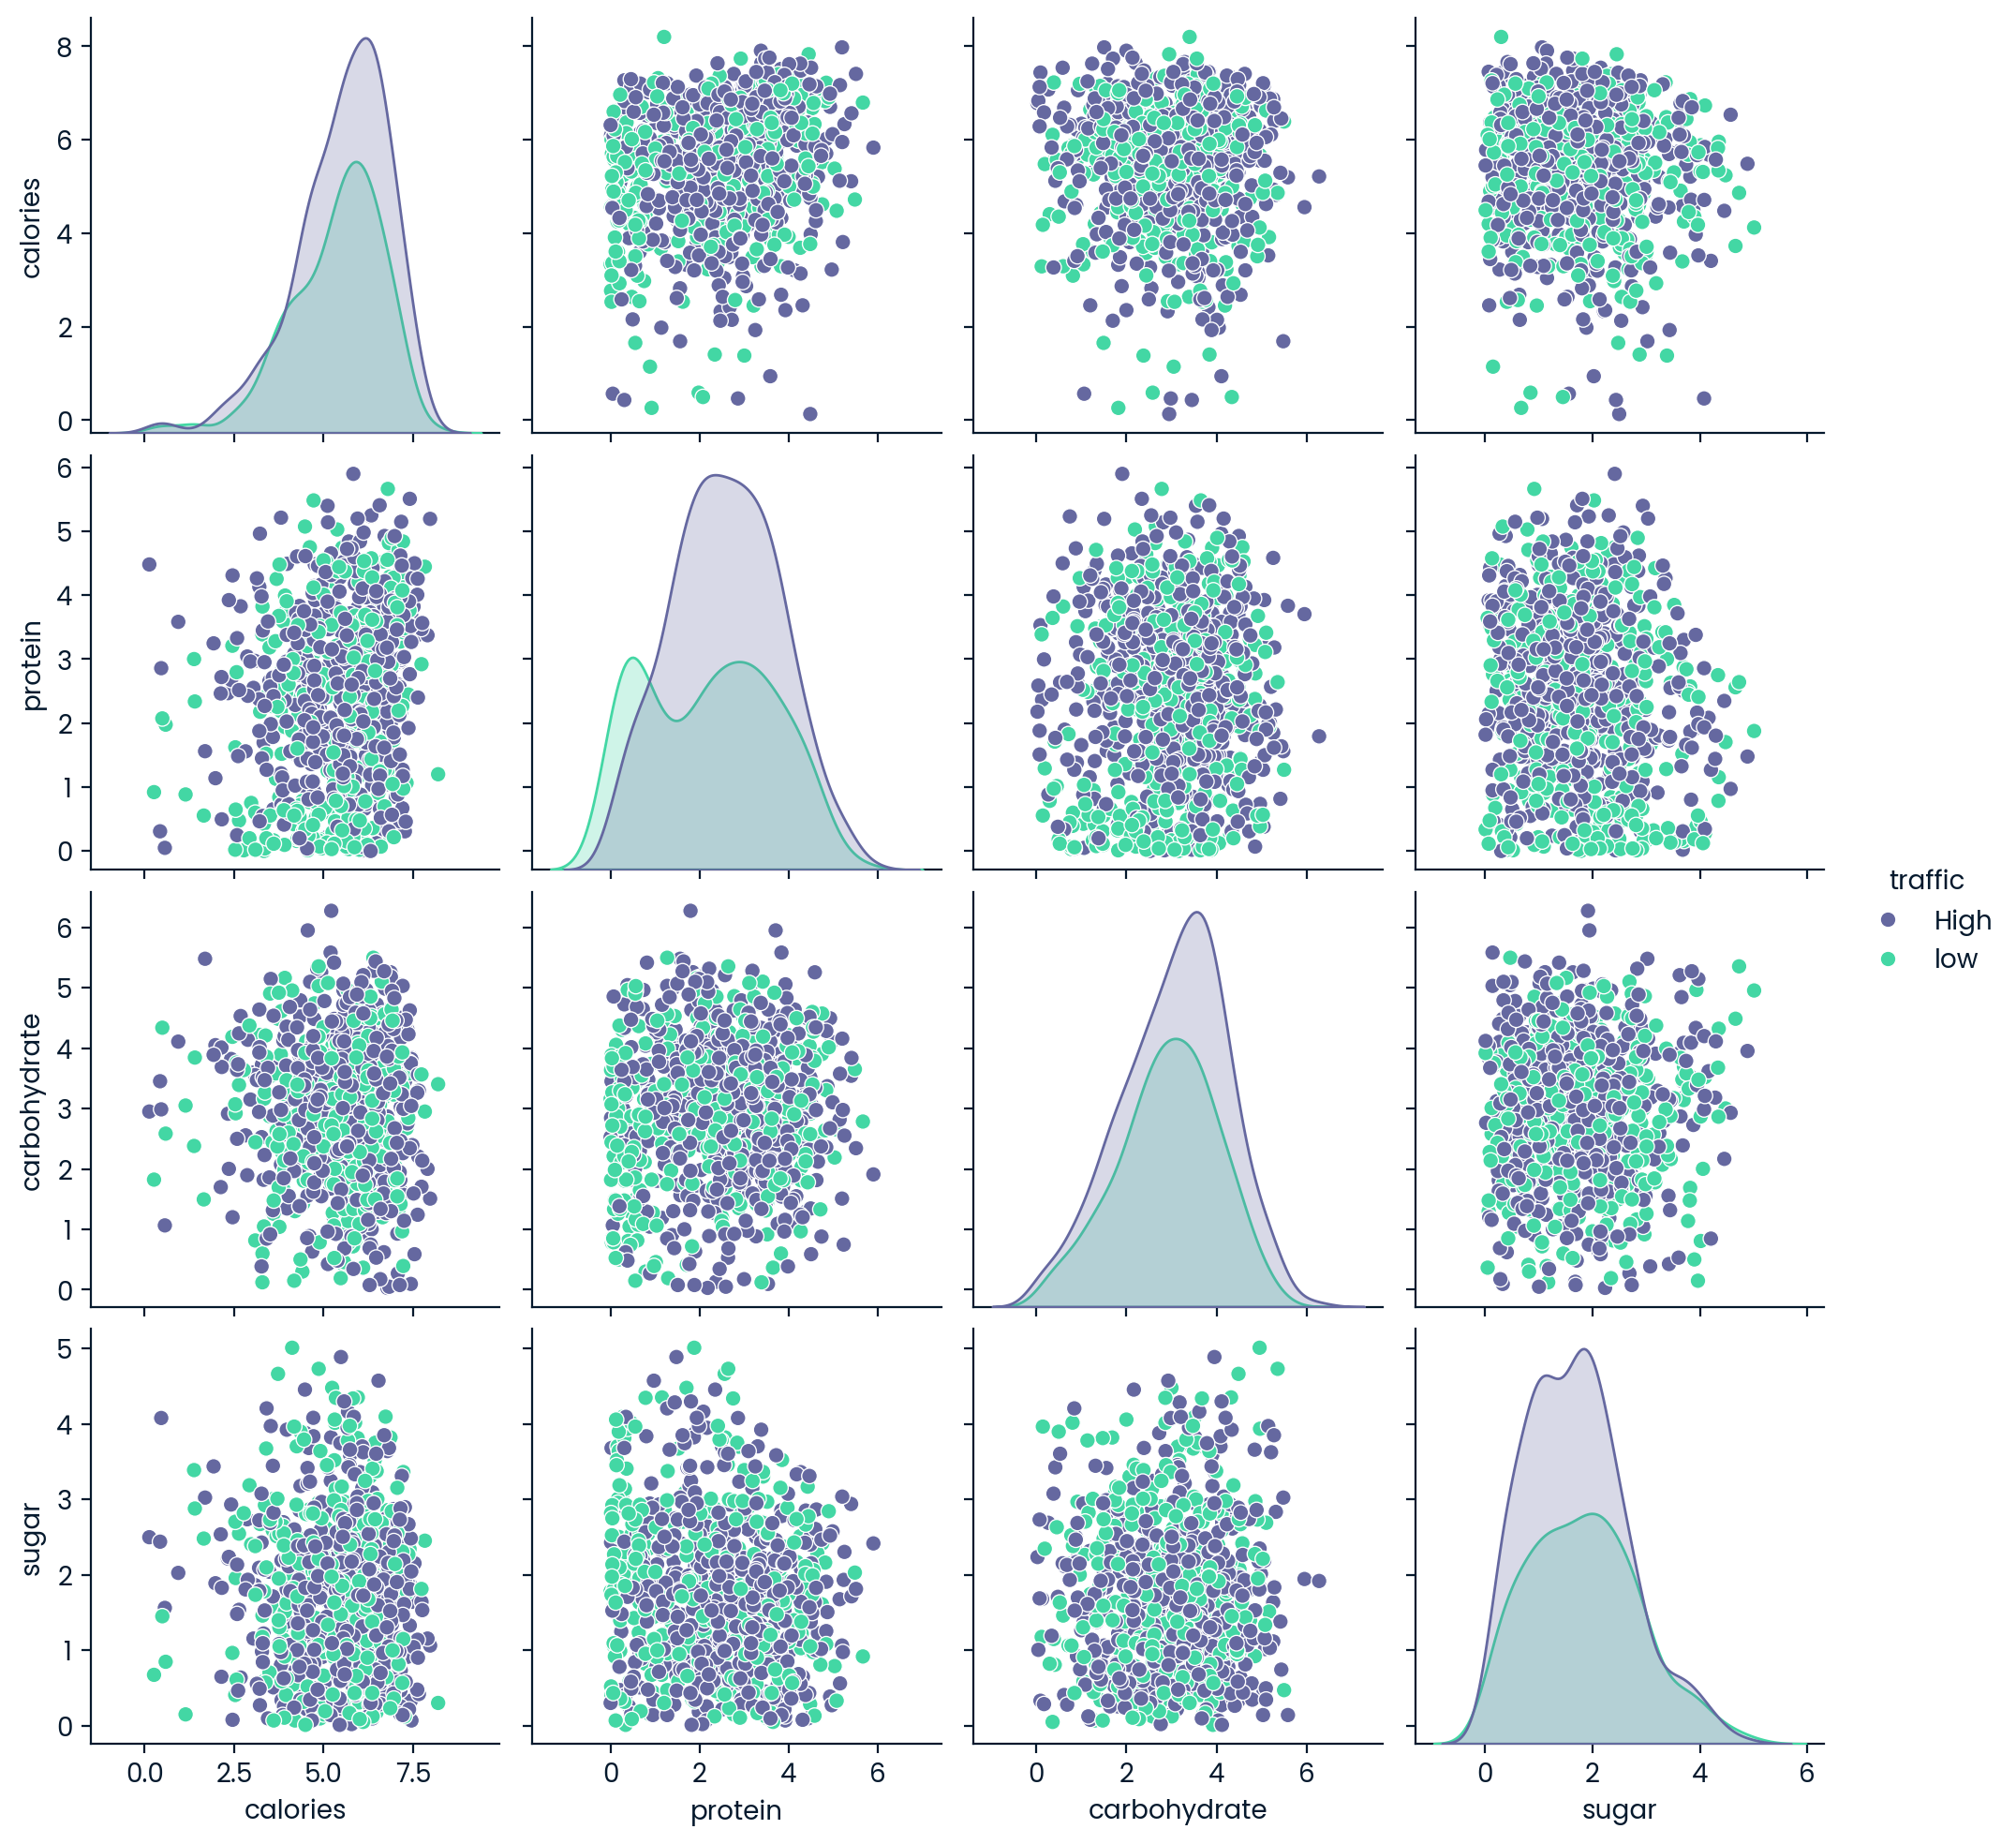

In [82]:
sns.pairplot(df, hue='traffic', vars=nutrient_cols)
plt.show()

In [83]:
# One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=['category'])

# Label encode bucket columns
label_encoder = LabelEncoder()

bucket_columns = ['calories_bucket', 'protein_bucket', 'sugar_bucket', 'carbohydrate_bucket']

for col in bucket_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [84]:
# Making 'traffic' column a binary column
df['traffic'] = df['traffic'].replace({'High': 0, 'low': 1})

### Feature selection
The features I've decided to use are based on several iterations and experiments.


In [85]:
df.columns

Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'servings',
       'traffic', 'calories_bucket', 'protein_bucket', 'sugar_bucket',
       'carbohydrate_bucket', 'category_Beverages', 'category_Breakfast',
       'category_Chicken', 'category_Dessert', 'category_Lunch',
       'category_Meat', 'category_One Dish Meal', 'category_Pork',
       'category_Potato', 'category_Snacks', 'category_Vegetable'],
      dtype='object')

In [86]:
# Define features and target
drop_cols = ['recipe', 'traffic']

X = df.drop(drop_cols, axis=1)
y = df['traffic']

# 90:10 train test split with stratify enabled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

One last look at the data before training the model

In [87]:
X.head()

,calories,carbohydrate,sugar,protein,servings,calories_bucket,protein_bucket,sugar_bucket,carbohydrate_bucket,category_Beverages,category_Breakfast,category_Chicken,category_Dessert,category_Lunch,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Snacks,category_Vegetable
1,3.596764,3.677819,0.506818,0.652325,4,1,1,1,2,0,0,0,0,0,0,0,0,1,0,0
2,6.819230,3.776890,1.408545,1.355835,1,0,1,1,2,0,1,0,0,0,0,0,0,0,0,0
3,4.585274,3.451890,3.679586,0.019803,4,2,1,0,2,1,0,0,0,0,0,0,0,0,0,0
4,3.333989,1.047319,0.587787,0.425268,4,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
5,6.539803,1.495149,0.974560,4.006060,2,2,0,1,1,0,0,0,0,0,0,1,0,0,0,0


### Model Selection & Evaluation Metric
Predicting whether the traffic a recipe will attract will be high or low is a classification problem in machine learning. So I'll use an algorithm suitable for classification tasks. 

The data's current state:
- Existence of non-linear relationships
- Existence of outliers
- Inbalanced because of the 'snacks' category under the category column
- < 1000 rows for training set
- Sparsity after one-hot encoding 'category' column

I've decided to train an **XGBoost** model as the baseline model because it's robust enough to handle the outliers, non linear relationships, sparsity, and class inbalance in the data. Not to mention, it's also suitable for the size of the data. 

I'll compare its performance with the comparison model - **SVC** which is a close alternative.

### Evaluation Metric 

Business goal:
- Predict which recipes will lead to high traffic
- Correctly predict high traffic recipes 80% of the time

Interpretation: at least 80% of the recipes predicted to generate high traffic (TP) must truly generate high traffic. The priority metric therefore would be **Precision**.

Precision measures the proportion of correctly predicted high-traffic recipes (true positives) among all recipes predicted as high-traffic (true positives + false positives) so I'll prioritize the model with higher precision. 

Other metric: Confusion Matrix (to validate the precision and other metrics)


### Baseline Model (XGBoost Classifier)
I'll perform some hyperparameter tuning with GridSearch first for optimal performance.

In [88]:
h_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb = XGBClassifier()
precision_scorer = make_scorer(precision_score, pos_label=0)

grid_search = GridSearchCV(estimator=xgb, param_grid=h_params, cv=5, n_jobs=-1, scoring=precision_scorer)

grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

best_estimator = grid_search.best_estimator_
test_precision = best_estimator.score(X_test, y_test)
print("Test Precision:", test_precision)


Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Test Precision: 0.8222222222222222


In [89]:
xgb = XGBClassifier(colsample_bytree=0.9, 
                    learning_rate=0.01, 
                    max_depth=3, 
                    n_estimators=100,
                    subsample=1.0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

XGB Precision: 0.8653846153846154


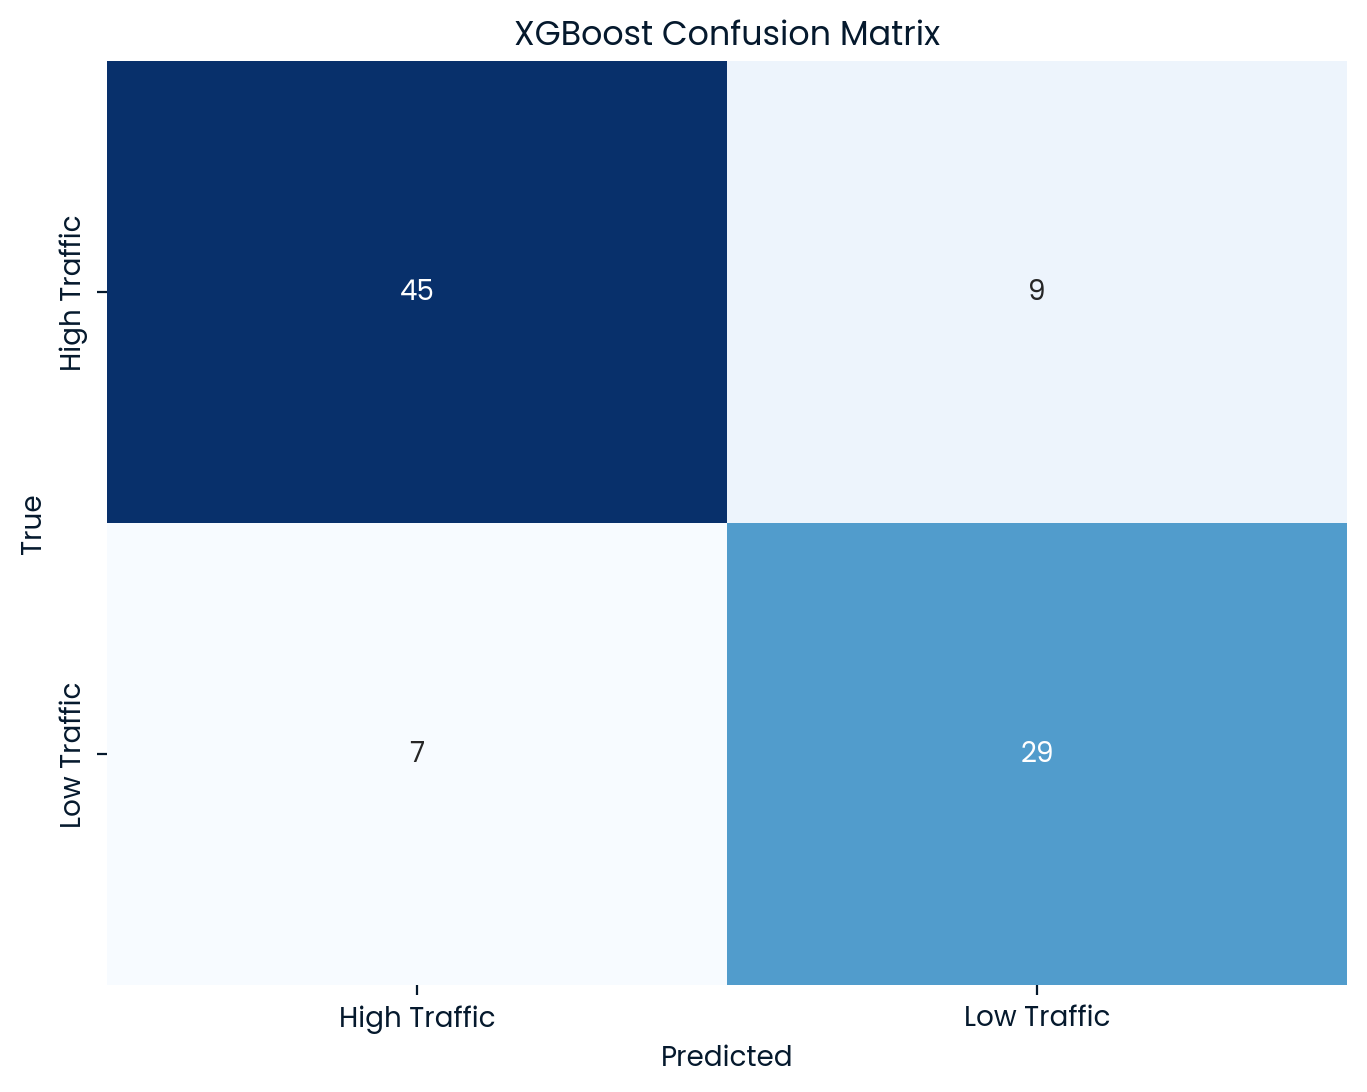

In [90]:
# Evaluation

y_pred = xgb.predict(X_test)

# precision
test_precision = precision_score(y_test, y_pred, pos_label=0)
print("XGB Precision:", test_precision)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['High Traffic', 'Low Traffic'])
plt.yticks(ticks=[0.5, 1.5], labels=['High Traffic', 'Low Traffic'])
plt.show()

### Comparison Model (SVC - Support Vector Classifier)
I'll perform hyper parameter tuning here as well to ensure optimum performance.

In [91]:
# params
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

svc = SVC()
precision_scorer = make_scorer(precision_score, pos_label=0)

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring=precision_scorer)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_svc_model = grid_search.best_estimator_

accuracy = best_svc_model.score(X_test, y_test)
print("Best parameters:", best_params)
print("Accuracy of the best model:", accuracy)


Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy of the best model: 0.8222222222222222


In [92]:
svc = SVC(C=0.1, gamma='scale', kernel='linear', random_state=42)
svc.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', random_state=42)

SVC Precision:  0.8653846153846154


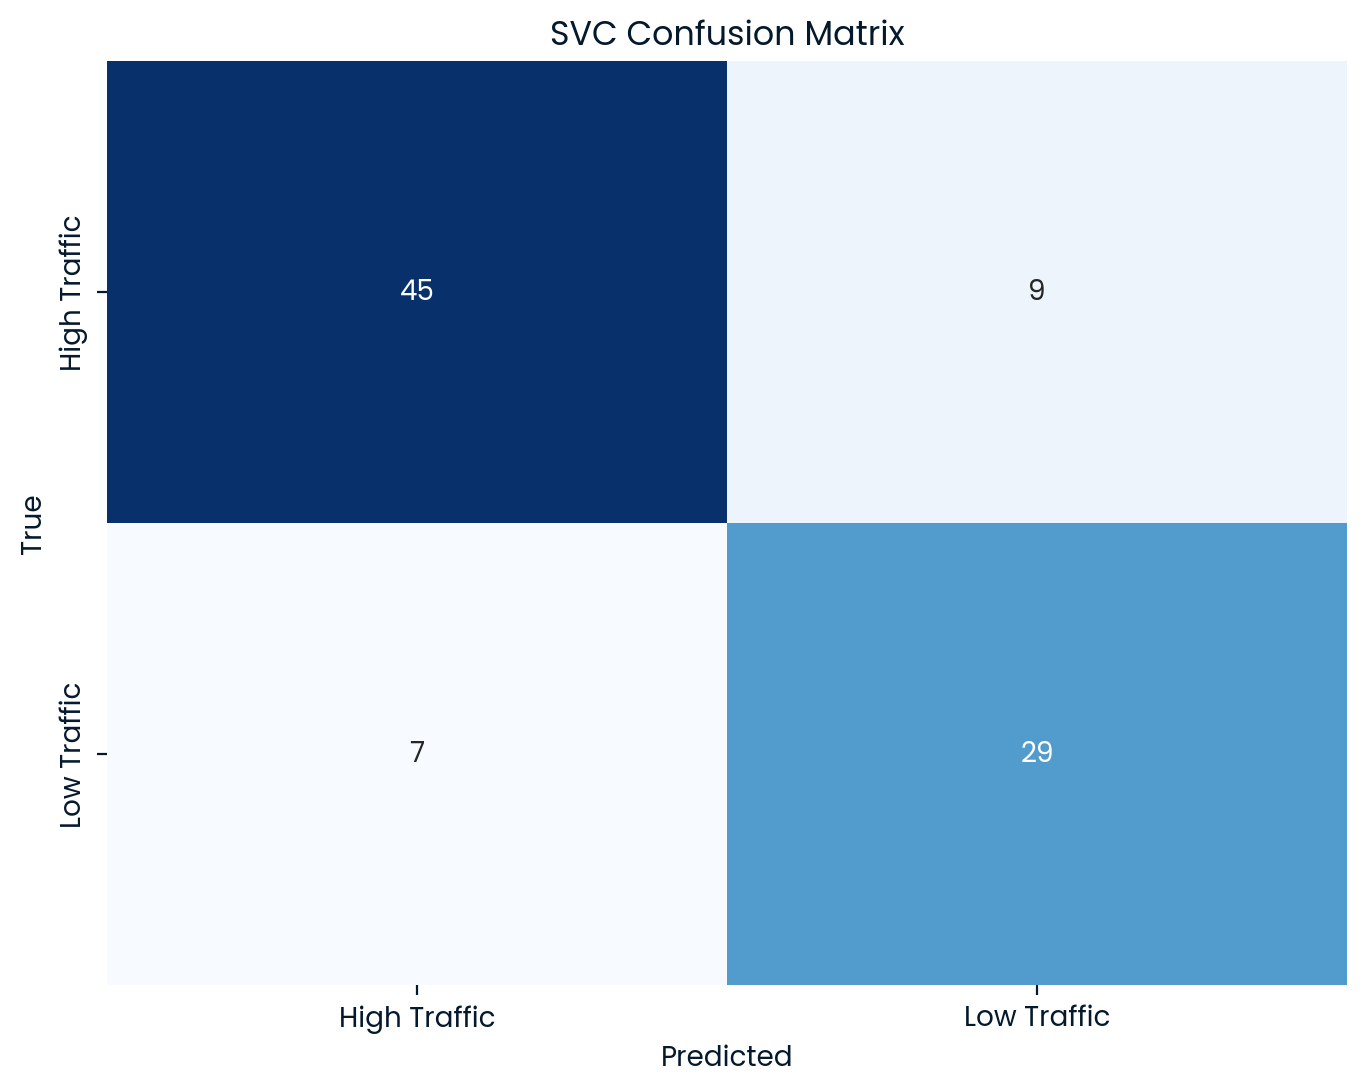

In [93]:
# evaluation
svc_y_pred = svc.predict(X_test)

# precision
svc_test_precision = precision_score(y_test, svc_y_pred, pos_label=0)
print("SVC Precision: ", svc_test_precision)

# confusion matrix
svc_cm = confusion_matrix(y_test, svc_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVC Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['High Traffic', 'Low Traffic'])
plt.yticks(ticks=[0.5, 1.5], labels=['High Traffic', 'Low Traffic'])
plt.show()

### Results
- The precision of XGBoost Classifier:
    - On training set: 0.822
    - On testing set: 0.865
        - Inference: Good to go. No overfitting.
- The precision of Support Vector Classifier:
    - On training set: 0.822
    - On testing set: 0.865
        - Inference: Also good to go. No overfitting.

The result reveals that the XGBoost model and SVC model are equally good at correctly identifying high-traffic recipes. 

## Evaluate Business Metrics 

Tasty Bytes requires a model that correctly predicts which recipes will generate high traffic at least 80% of the time. 

They don't want the model to falsely predict a low-traffic recipe as high. 

That means they want a model that's more optimized for high true positives and low false positives, an 80 to 20 ratio to be exact.

Conveniently, there's a classification metric that'll help meet this need. It's called Precision. 

A high precision in this context means that of all recipes predicted to be 'high traffic recipes', most were indeed high traffic recipes. 

The two models (XGBoost and SVC) used to carry out this task both performed optimally and had the same level of precision.
- On training set: 82.2%
- On testing set: 86.5%

This is well above the threshold of 80% which is the **KPI** for these models.

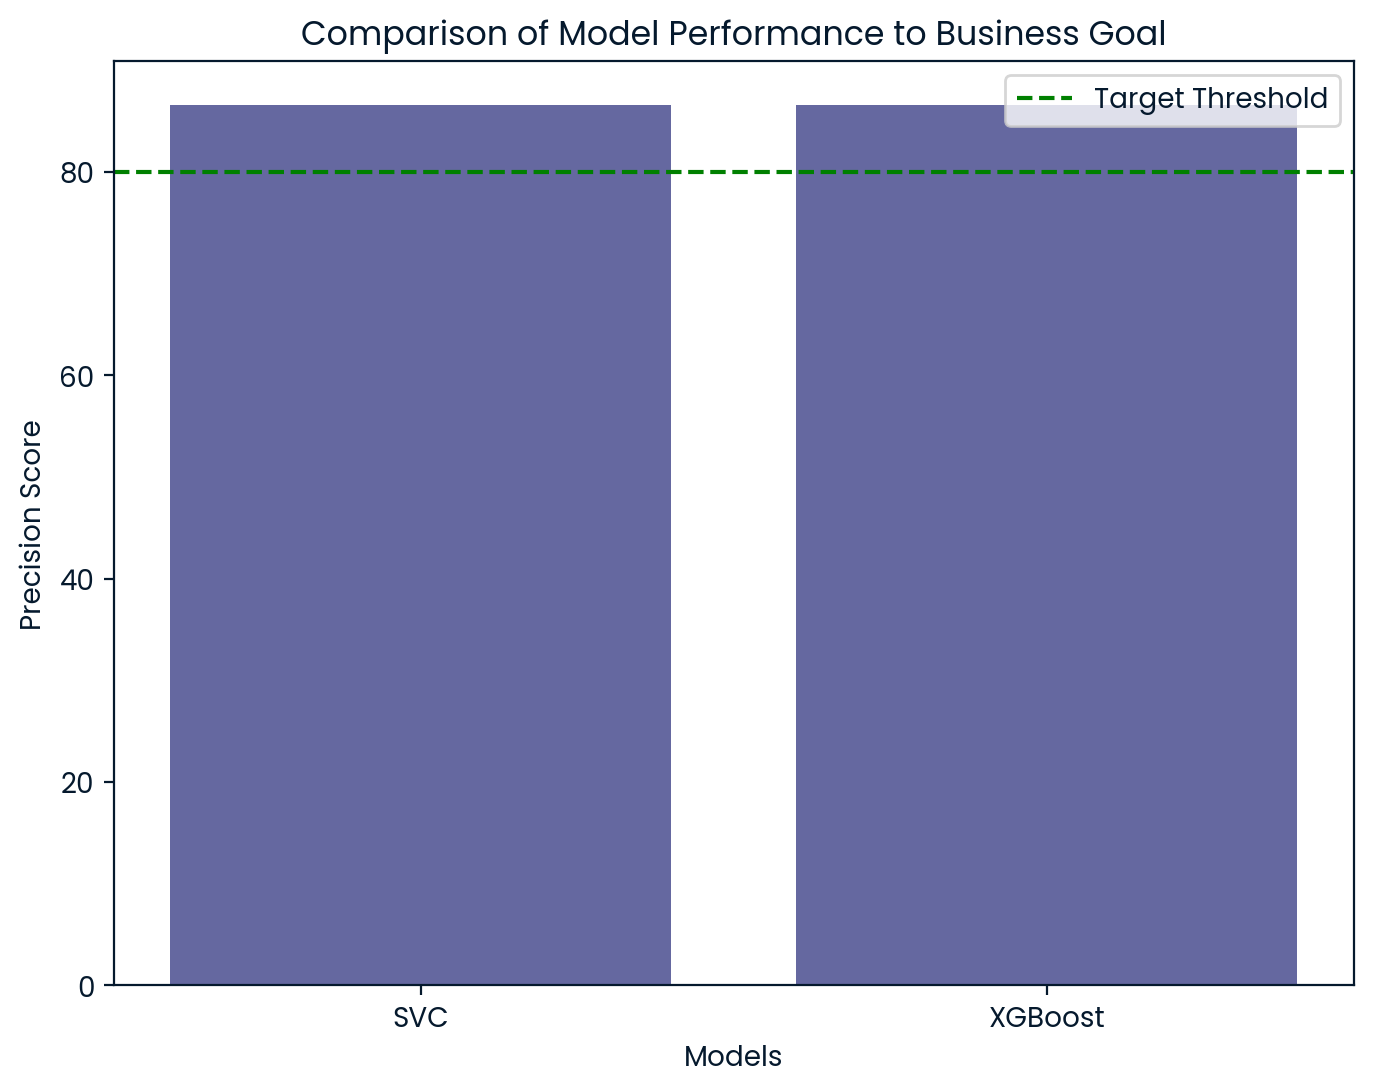

In [94]:
threshold = 80

models = ['SVC', 'XGBoost']

precision_scores = [svc_test_precision*100, test_precision*100]

plt.figure(figsize=(8, 6))
plt.bar(models, precision_scores)
plt.axhline(y=threshold, color='green', linestyle='--', label='Target Threshold')

plt.xlabel('Models')
plt.ylabel('Precision Score')
plt.title('Comparison of Model Performance to Business Goal')
plt.legend()
plt.show()


## Recommendations
- I suggest that Tasty Bytes deploy the XGBoost and SVC models in a test environment first to monitor its performance for a few weeks. 
    - This could be done in an A/B testing environment to see which eventually outperforms the other
    - This could be done in parallel i.e. only displaying recipes that **both** models have predicted to generate high traffic
- The model is only as good as the data it's fed, so I recommend capturing more data in the dataset both horizontally (more features i.e. ingredients, cost, method) and vertically (more records/ rows)
- Keep tabs on the performance of each model and keep exploring ways to improve them in the test environment. Make fixes, tune hyper parameters, and try new feature selection/ engineering techniques. 
- Deploy the model to production and keep improving it with new data.
- For better and consistent result, I advise that Tasty Bytes ensures the completeness of their data especially in the nutrient columns. 
- The system should also be configured to record recipes that had both high and low traffic, not just high traffic.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation